In [1]:
from set_init import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dlbond.utils.trend_scan import trend_scan
from dlbond.utils.processor import Processor

c:\Users\yana\Desktop\github\trade_index\notebooks
変更後C:\Users\yana\Desktop\github\trade_index


## トレンドスキャン法の確認（スニペット5.3）

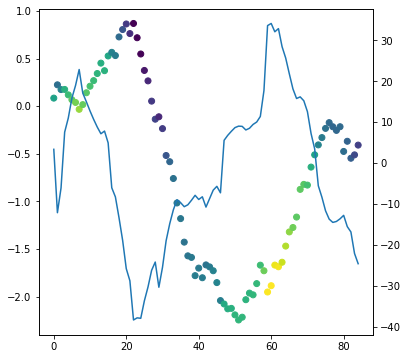

<AxesSubplot:>

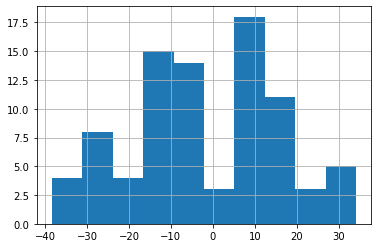

In [2]:
df0 = pd.Series(np.random.normal(0, .1, 100)).cumsum()
df0 += np.sin(np.linspace(0, 10, df0.shape[0]))
df1 = trend_scan(df0.index, df0, [5, 15, 1])

fig = plt.figure(figsize = (6, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(df1.index, df0.loc[df1.index].values, c = df1['tVal'].values, cmap='viridis')
ax2 = ax1.twinx()
ax2.plot(df1.index, df1['tVal'].values)
plt.show()
df1['tVal'].hist()

## 市場データをもとにトレンドスキャン法を適用した場合の可視化

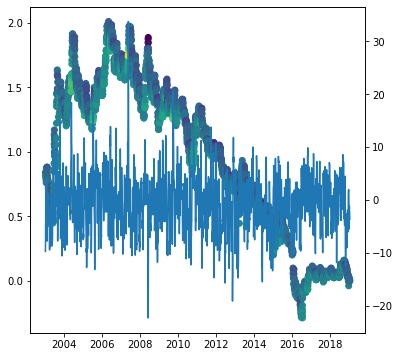

<AxesSubplot:>

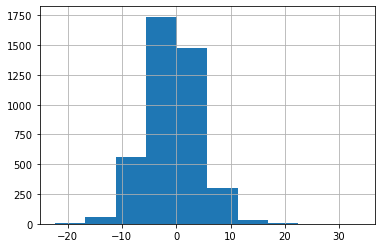

In [3]:
pc = Processor(dfs_input, config)
pc.build_dataset()
t_values = pc.convert_trend_scan(pc.y_raw)

fig = plt.figure(figsize = (6, 6))
ax1 = fig.add_subplot(111)
index_ = t_values.index
ax1.scatter(index_, pc.y_raw.loc[index_].values, c = t_values.values, cmap='viridis')
ax2 = ax1.twinx()
ax2.plot(index_, t_values.values)
plt.show()
t_values.hist()

## リーケージの確認

In [4]:
t_values.tail(11)

Date
2019-01-11   -3.511986
2019-01-14   -3.305689
2019-01-15   -2.467914
2019-01-16   -1.921408
2019-01-17   -1.083894
2019-01-18   -2.253081
2019-01-21   -2.234592
2019-01-22   -2.537911
2019-01-23   -3.530876
2019-01-24   -3.556149
2019-01-25    -3.66029
Name: tVal, dtype: object

In [5]:
pc.y_raw.tail(11)

GJGB10 index
Date                    
2019-01-25        -0.003
2019-01-28         0.002
2019-01-29         0.009
2019-01-30         0.005
2019-01-31         0.005
2019-02-01        -0.012
2019-02-04        -0.009
2019-02-05        -0.009
2019-02-06        -0.013
2019-02-07        -0.008
2019-02-08        -0.029

In [8]:
diff_term = set(t_values.tail(15).index) - set(pc.y_raw.tail(15).index)
print(diff_term)
print(f'リーケージ回避期間の差分 : {len(diff_term)}')
max_window = pc.config['config_target']['scan_window'][1]
assert max_window == len(diff_term), (
    f'推定ウィンドウのL期間の探索候補の最大値分が目的変数のラベルから削除されている必要があります. \n max_window = {max_window} != diff_term= {len(diff_term)}'
)

{Timestamp('2019-01-16 00:00:00'), Timestamp('2019-01-09 00:00:00'), Timestamp('2019-01-08 00:00:00'), Timestamp('2019-01-07 00:00:00'), Timestamp('2019-01-15 00:00:00'), Timestamp('2019-01-10 00:00:00'), Timestamp('2019-01-11 00:00:00'), Timestamp('2019-01-14 00:00:00'), Timestamp('2019-01-17 00:00:00'), Timestamp('2019-01-18 00:00:00')}
リーケージ回避期間の差分 : 10
